<a href="https://colab.research.google.com/github/PardeepBhurtel/VisualizationCNN/blob/main/visualizationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importance of Visualizing a CNN model
 Typically, the reasons listed below are the most important points for a deep learning practitioner to remember:  
- Understanding how the model works
- Assistance in Hyperparameter tuning
- Finding out the failures of the model and getting an intuition of why they fail
- Explaining the decisions to a consumer / end-user or a business executive

## Importing Required modules



In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D
import matplotlib.pyplot as plt
import numpy as np

Convolutional neural networks are designed to work with image data, and their structure and function suggest that should be less inscrutable than other types of neural networks.
To visualize the model an single image is loaded using `keras.preprocessing`.



In [ ]:
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
img = load_img('cat1.jpg', target_size=(224, 224)) #VGG user 224 as input

Since the CNN doesn't works with a pixel value so that image needs to be converted into Array i.e. Image Data

In [ ]:
# convert the image to an array
x = img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

Image data with a shape`(height=224,width=224,RGB_channels=3)` as an input passes into CNN and preprocessing the input with `filters_size=32,64,128` respectively with `kernal_size=(3,3)`.After each Convolutional layers appllying `MaxPooling2D(2,2)`

In [ ]:
cnn = models.Sequential([
                         ##cnn_layers
                         layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3)),
                         layers.MaxPooling2D(2,2),

                         layers.Conv2D(filters=32,kernel_size=(3,3)),
                         layers.MaxPooling2D(2,2),

                         layers.Conv2D(filters=64,kernel_size=(3,3)),
                         layers.MaxPooling2D(2,2),

                         layers.Conv2D(filters=64,kernel_size=(3,3)),
                         layers.MaxPooling2D(2,2),

                         layers.Conv2D(filters=128,kernel_size=(3,3)),
                         layers.MaxPooling2D(2,2),

                         layers.Conv2D(filters=128,kernel_size=(3,3)),
                         layers.MaxPooling2D(2,2)

                         



                         

])

Running the model.sequential assigned into cnn object as a model and print a summary of the loaded model.
We can see that the layers are well named, organized into blocks, and named with integer indexes within each block.

In [ ]:
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

The model summary printed above summarizes the output shape of each layer, e.g. the shape of the resulting feature maps.

In [ ]:
#get list of layer from model
layer_outputs = [layer.output for layer in cnn.layers[1:]]

In [ ]:

##create a visualized model
visualized_model = tf.keras.models.Model(inputs=cnn.input,outputs=layer_outputs)

## loading a next image which has to be predited on a builed model 

In [ ]:
#load image for prediction
img = load_img('cat2.jpg', target_size=(224, 224)) #VGG user 224 as input


In [ ]:
y = img_to_array(img)

In [ ]:
y.shape

(224, 224, 3)

In [ ]:
y=y.reshape(1,224,224,3)

In [ ]:
#rescale the image
y=y/255

We are now ready to get the feature map. We can do this easy by calling the `visualized_model.predict()` function and passing in the prepared single image.

In [ ]:
feature_maps=visualized_model.predict(y)
print(len(feature_maps))

11


On assigning  new image data into a predicatable model , we got a feature_maps with an array length of 11

In [ ]:
print(feature_maps)

[array([[[[ 1.77054387e-03,  1.87258353e-03,  9.55655647e-04, ...,
           4.65995632e-03,  2.81052827e-03, -4.64827428e-03],
         [ 1.77054387e-03,  1.87258353e-03,  9.55655647e-04, ...,
           4.65995632e-03,  2.81052827e-03, -4.64827428e-03],
         [ 1.77054387e-03,  1.87258353e-03,  9.55655647e-04, ...,
           4.65995632e-03,  2.81052827e-03, -4.64827428e-03],
         ...,
         [ 3.74693982e-03,  2.86349747e-03,  1.99292274e-03, ...,
           9.34357196e-03,  3.91295878e-03, -1.06633324e-02],
         [ 3.74693982e-03,  2.86349747e-03,  1.99292274e-03, ...,
           9.34357196e-03,  3.91295878e-03, -1.06633324e-02],
         [ 3.74693982e-03,  2.86349747e-03,  1.99292274e-03, ...,
           9.34357196e-03,  3.91295878e-03, -1.06633324e-02]],

        [[ 1.77054387e-03,  1.87258353e-03,  9.55655647e-04, ...,
           4.65995632e-03,  2.81052827e-03, -4.64827428e-03],
         [ 1.77054387e-03,  1.87258353e-03,  9.55655647e-04, ...,
           4.65995632

Listing out all sort of layers name included in a model

In [ ]:
  #show layers available in a model
  layer_names = [layer.name for layer in cnn.layers]
  print(layer_names)

['conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7', 'conv2d_8', 'max_pooling2d_8', 'conv2d_9', 'max_pooling2d_9', 'conv2d_10', 'max_pooling2d_10', 'conv2d_11', 'max_pooling2d_11']


In [ ]:
%matplotlib inline

Looking after what sort of input image which is to be predict on a model

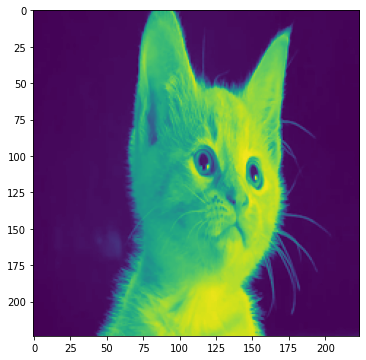

In [ ]:
# Plot images
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img);
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1)
    ax[1].imshow(img2);
img = Image.open('cat2.jpg')
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img=img)

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

Running the example first summarizes the new, smaller model that takes an image and outputs a feature map.
Plotting the images according to predictable models summary.

(1, 111, 111, 32)
(1, 109, 109, 32)
(1, 54, 54, 32)
(1, 52, 52, 64)
(1, 26, 26, 64)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 10, 10, 128)
(1, 5, 5, 128)
(1, 3, 3, 128)
(1, 1, 1, 128)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


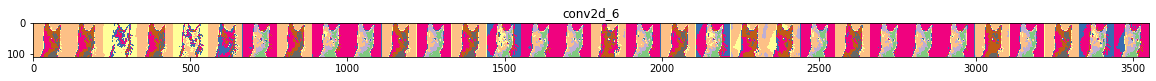

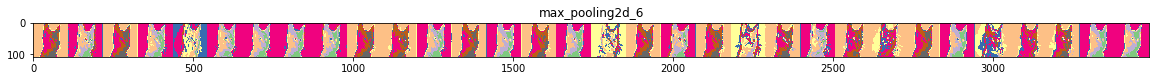

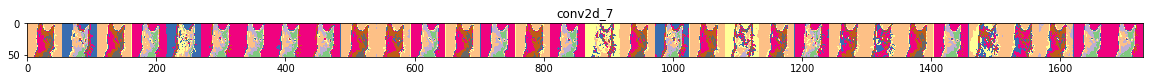

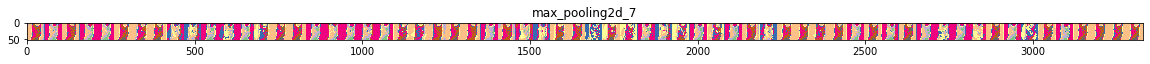

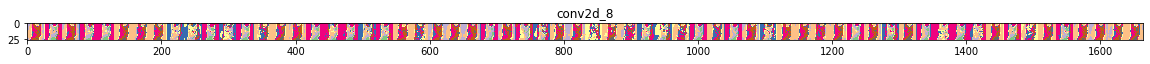

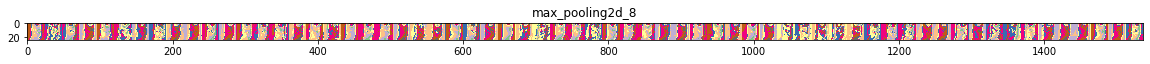

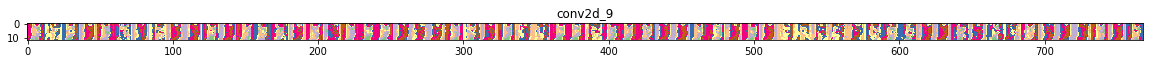

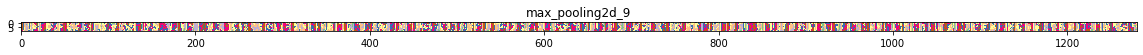

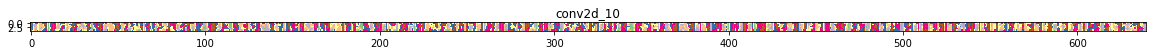

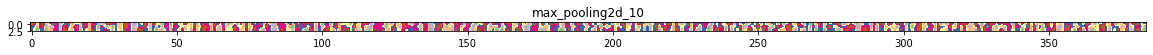

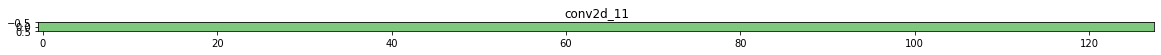

In [ ]:
#plotting the graph
for layer_names,feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) ==4:
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0,:,:,i]
      x -= x.mean()
      x /= x.std()
      x *=64
      x +=128
      x = np.clip(x,0,255).astype('uint8')
      display_grid[:,i*size:(i+1)*size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale* channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='Accent')


Above figure shows out the Visualization of each filter size allocated in a CNN Layer and how predicts how model behaves with an input.